# Anamoly Detection in weather patterns
# Neural network(ANN) Approach

## Project for Special Topic DS ML 

Team : 


*   A Anantha Krishna 
*   K Venkat Ramnan
*   Khushi Sahay
*   Ruthu Shankar



Data            Num of samples
Anomaly(1)            873
Not Anomaly(0)      42,735

 # Version 1.0.0
 Start of this notebook
 29 November 2020 
 1800 hrs IST
 

In [ ]:
df=pd.read_csv('/content/ny_lof.csv')

FileNotFoundError: ignored

In [ ]:
df.shape

(43609, 9)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
df.isnull().sum()

datetime          0
Latitude          0
Longitude         0
Humidity          0
Pressure          0
Temperature       0
Wind_Direction    0
Wind_Speed        0
anomaly           0
dtype: int64

In [ ]:
df

,datetime,Latitude,Longitude,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,anomaly
0,01/10/2012 13:00,40.714272,-74.005966,58,1012,288.220000,260,7,1
1,01/10/2012 14:00,40.714272,-74.005966,57,1012,288.247676,260,7,0
2,01/10/2012 15:00,40.714272,-74.005966,57,1012,288.326940,260,7,0
3,01/10/2012 16:00,40.714272,-74.005966,57,1012,288.406203,260,7,0
4,01/10/2012 17:00,40.714272,-74.005966,57,1012,288.485467,261,6,1
...,...,...,...,...,...,...,...,...,...
43604,27/10/2017 20:00,40.714272,-74.005966,36,1019,289.980000,0,3,0
43605,27/10/2017 21:00,40.714272,-74.005966,38,1019,289.480000,0,1,0
43606,27/10/2017 22:00,40.714272,-74.005966,54,1019,287.920000,196,2,0
43607,27/10/2017 23:00,40.714272,-74.005966,62,1020,285.830000,171,3,0


In [ ]:
df.head()

,datetime,Latitude,Longitude,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,anomaly
0,01/10/2012 13:00,40.714272,-74.005966,58,1012,288.220000,260,7,1
1,01/10/2012 14:00,40.714272,-74.005966,57,1012,288.247676,260,7,0
2,01/10/2012 15:00,40.714272,-74.005966,57,1012,288.326940,260,7,0
3,01/10/2012 16:00,40.714272,-74.005966,57,1012,288.406203,260,7,0
4,01/10/2012 17:00,40.714272,-74.005966,57,1012,288.485467,261,6,1


In [ ]:
del df['datetime']

In [ ]:
df.head()

,Latitude,Longitude,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,anomaly
0,40.714272,-74.005966,58,1012,288.220000,260,7,1
1,40.714272,-74.005966,57,1012,288.247676,260,7,0
2,40.714272,-74.005966,57,1012,288.326940,260,7,0
3,40.714272,-74.005966,57,1012,288.406203,260,7,0
4,40.714272,-74.005966,57,1012,288.485467,261,6,1


In [ ]:
X= df.iloc[:, :-1].values
y = df.iloc[:, 7].values

In [ ]:
y

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [ ]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(128, activation='relu')(input_layer)
dense_layer_2 = Dense(128, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(128, activation='relu')(dense_layer_2)
output = Dense(1, activation='sigmoid')(dense_layer_3) # Can be sigmoid as well 

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 34,177
Trainable params: 34,177
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=250, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
112/112 [==============================] - 0s 4ms/step - loss: 1.4726 - acc: 0.9629 - val_loss: 1.5637 - val_acc: 0.9802
Epoch 2/100
112/112 [==============================] - 0s 3ms/step - loss: 0.4837 - acc: 0.9709 - val_loss: 0.1039 - val_acc: 0.9802
Epoch 3/100
112/112 [==============================] - 0s 3ms/step - loss: 0.1185 - acc: 0.9799 - val_loss: 0.0936 - val_acc: 0.9802
Epoch 4/100
112/112 [==============================] - 0s 3ms/step - loss: 0.1041 - acc: 0.9799 - val_loss: 0.1220 - val_acc: 0.9802
Epoch 5/100
112/112 [==============================] - 0s 3ms/step - loss: 0.1064 - acc: 0.9799 - val_loss: 0.1033 - val_acc: 0.9802
Epoch 6/100
112/112 [==============================] - 0s 3ms/step - loss: 0.1014 - acc: 0.9799 - val_loss: 0.1001 - val_acc: 0.9802
Epoch 7/100
112/112 [==============================] - 0s 3ms/step - loss: 0.1153 - acc: 0.9799 - val_loss: 0.1051 - val_acc: 0.9802
Epoch 8/100
112/112 [==============================] - 0s 3ms/step - 

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1]*100 ,' %')

273/273 [==============================] - 0s 2ms/step - loss: 0.0946 - acc: 0.9799
Test Score: 0.09456254541873932
Test Accuracy: 97.99357652664185  %


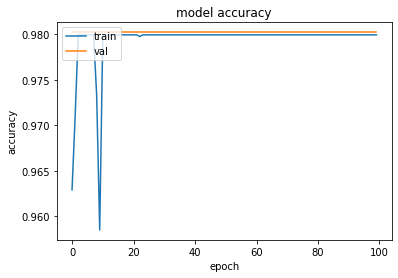

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
train_sc=model.evaluate(X_train,y_train,verbose=1)
print('Train acc',train_sc[1]*100)

1091/1091 [==============================] - 2s 2ms/step - loss: 0.0946 - acc: 0.9800
Train acc 97.99925684928894
